In [ ]:
from google.colab import files

# Upload the shapefile
uploaded = files.upload()

Saving California_Zip_Codes.geojson to California_Zip_Codes.geojson


In [2]:
import geopandas as gpd

# Replace with the path to your shapefile
shapefile_path = 'RR_CA_HQ_Transit_Areas.shp'

try:
    # Read the shapefile into a GeoDataFrame
    gdf = gpd.read_file(shapefile_path)

    # Print the GeoDataFrame
    print(gdf.head())  # Print the first few rows for verification
except Exception as e:
    print(f"Error: {e}")




   OBJECTID                             agency_pri agency_sec  \
0         1  Alameda-Contra Costa Transit District       None   
1         2  Alameda-Contra Costa Transit District       None   
2         3  Alameda-Contra Costa Transit District       None   
3         4  Alameda-Contra Costa Transit District       None   
4         5  Alameda-Contra Costa Transit District       None   

         hqta_type                                  hqta_detai route_id  \
0  hq_corridor_bus  stop_along_hq_bus_corridor_single_operator       10   
1  hq_corridor_bus  stop_along_hq_bus_corridor_single_operator       12   
2  hq_corridor_bus  stop_along_hq_bus_corridor_single_operator       14   
3  hq_corridor_bus  stop_along_hq_bus_corridor_single_operator       18   
4  hq_corridor_bus  stop_along_hq_bus_corridor_single_operator       19   

                                          base64_url base64_u_1  \
0  aHR0cHM6Ly9hcGkuNTExLm9yZy90cmFuc2l0L2RhdGFmZW...       None   
1  aHR0cHM6Ly9hcGkuNTExL

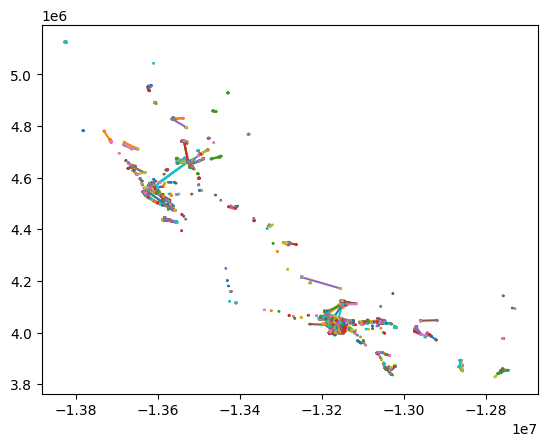

In [4]:
import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt

sf = shp.Reader("RR_CA_HQ_Transit_Areas.dbf")

plt.figure()
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()

In [5]:
import geopandas as gpd
from pyproj import Transformer

# Replace with the path to your California shapefile
shapefile_path = 'RR_CA_HQ_Transit_Areas.shp'
gdf = gpd.read_file(shapefile_path)
print(type(gdf))

# Check the current CRS
print("Current CRS:", gdf.crs)

# Set the CRS for the GeoDataFrame
# Replace 'EPSG:XXXX' with the correct EPSG code for your data
gdf.crs = 'EPSG:2227'

# Check the current CRS again
print("Updated CRS:", gdf.crs)

# Define the transformer
transformer = Transformer.from_crs(gdf.crs, "EPSG:4326", always_xy=True)

# Transform the geometry coordinates to latitude and longitude
gdf["geometry"] = gdf["geometry"].to_crs("EPSG:4326")

# Extract latitude and longitude
gdf["latitude"] = gdf["geometry"].centroid.y
gdf["longitude"] = gdf["geometry"].centroid.x

# Print the updated GeoDataFrame
print(gdf.head())

<class 'geopandas.geodataframe.GeoDataFrame'>
Current CRS: EPSG:3857
Updated CRS: EPSG:2227
   OBJECTID                             agency_pri agency_sec  \
0         1  Alameda-Contra Costa Transit District       None   
1         2  Alameda-Contra Costa Transit District       None   
2         3  Alameda-Contra Costa Transit District       None   
3         4  Alameda-Contra Costa Transit District       None   
4         5  Alameda-Contra Costa Transit District       None   

         hqta_type                                  hqta_detai route_id  \
0  hq_corridor_bus  stop_along_hq_bus_corridor_single_operator       10   
1  hq_corridor_bus  stop_along_hq_bus_corridor_single_operator       12   
2  hq_corridor_bus  stop_along_hq_bus_corridor_single_operator       14   
3  hq_corridor_bus  stop_along_hq_bus_corridor_single_operator       18   
4  hq_corridor_bus  stop_along_hq_bus_corridor_single_operator       19   

                                          base64_url base64_u_1  \

<ipython-input-5-cad8ad1776ad>:26: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["latitude"] = gdf["geometry"].centroid.y
<ipython-input-5-cad8ad1776ad>:27: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["longitude"] = gdf["geometry"].centroid.x


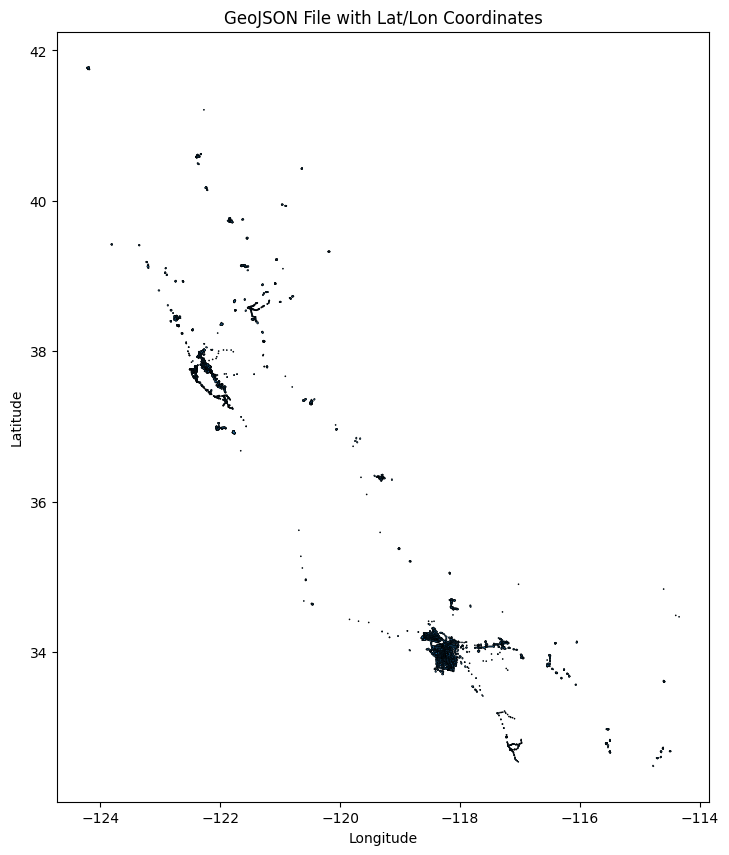

In [6]:
import geopandas as gpd
from pyproj import Transformer
import matplotlib.pyplot as plt

# Replace with the path to your GeoJSON file
geojson_path = 'CA_HQ_Transit_Areas.geojson'

gdf = gpd.read_file(geojson_path)

# Ensure that the 'geometry' column is recognized as a GeoSeries
gdf = gdf.set_geometry('geometry')

# Define the transformer
transformer = Transformer.from_crs(gdf.crs, "EPSG:4326", always_xy=True)

# Transform the entire GeoDataFrame to latitude and longitude
gdf = gdf.to_crs("EPSG:4326")

# Extract latitude and longitude
gdf["latitude"] = gdf["geometry"].apply(lambda geom: geom.centroid.y)
gdf["longitude"] = gdf["geometry"].apply(lambda geom: geom.centroid.x)

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, edgecolor='black', linewidth=0.5)
plt.title("GeoJSON File with Lat/Lon Coordinates")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


Plot saved as output_plot.tiff


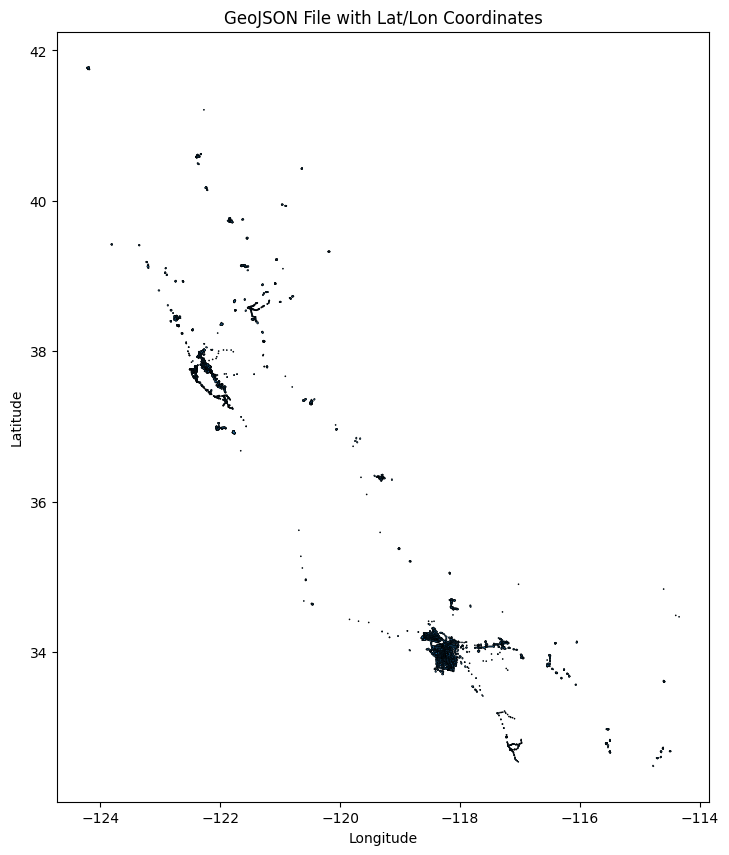

In [7]:
import geopandas as gpd
from pyproj import Transformer
import matplotlib.pyplot as plt

# Replace with the path to your GeoJSON file
geojson_path = 'CA_HQ_Transit_Areas.geojson'

gdf = gpd.read_file(geojson_path)

# Ensure that the 'geometry' column is recognized as a GeoSeries
gdf = gdf.set_geometry('geometry')

# Define the transformer
transformer = Transformer.from_crs(gdf.crs, "EPSG:4326", always_xy=True)

# Transform the entire GeoDataFrame to latitude and longitude
gdf = gdf.to_crs("EPSG:4326")

# Extract latitude and longitude
gdf["latitude"] = gdf["geometry"].apply(lambda geom: geom.centroid.y)
gdf["longitude"] = gdf["geometry"].apply(lambda geom: geom.centroid.x)

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, edgecolor='black', linewidth=0.5)
plt.title("GeoJSON File with Lat/Lon Coordinates")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Save the plot to a TIFF file without displaying it
output_path = 'output_plot.tiff'
plt.savefig(output_path, format='tiff', dpi=100)

print(f"Plot saved as {output_path}")

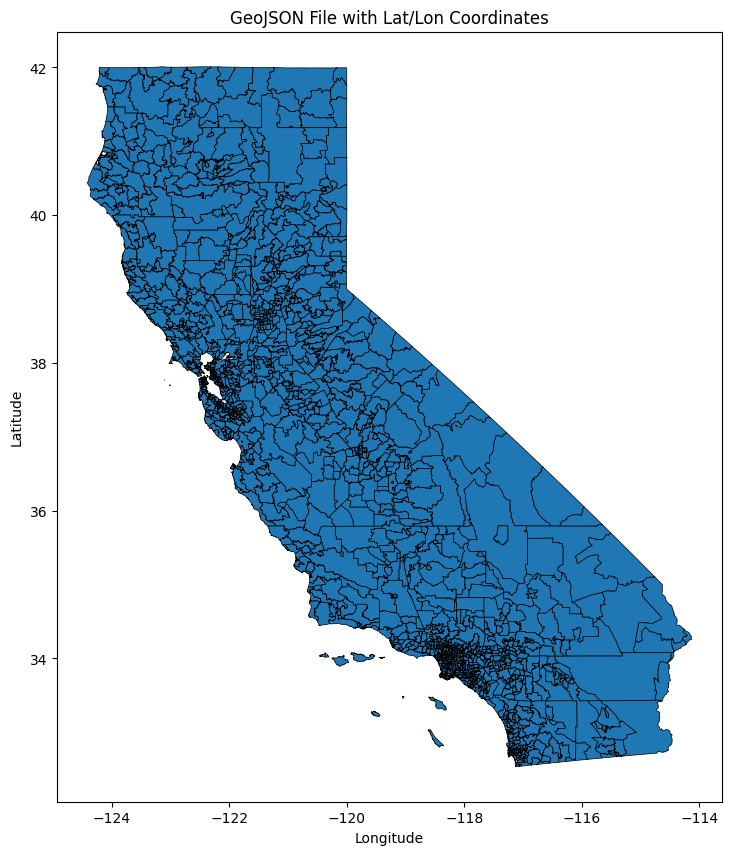

In [8]:
import geopandas as gpd
from pyproj import Transformer
import matplotlib.pyplot as plt

geojson_path = 'California_Zip_Codes.geojson'

gdf = gpd.read_file(geojson_path)

gdf = gdf.set_geometry('geometry')

transformer = Transformer.from_crs(gdf.crs, "EPSG:4326", always_xy=True)

gdf = gdf.to_crs("EPSG:4326")

gdf["latitude"] = gdf["geometry"].apply(lambda geom: geom.centroid.y)
gdf["longitude"] = gdf["geometry"].apply(lambda geom: geom.centroid.x)

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, edgecolor='black', linewidth=0.5)
plt.title("GeoJSON File with Lat/Lon Coordinates")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

<ipython-input-13-1c5da2cde9d9>:26: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf1["latitude"] = gdf1["geometry"].centroid.y
<ipython-input-13-1c5da2cde9d9>:27: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf1["longitude"] = gdf1["geometry"].centroid.x
<ipython-input-13-1c5da2cde9d9>:29: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf2["latitude"] = gdf2["geometry"].centroid.y
<ipython-input-13-1c5da2cde9d9>:30: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projec

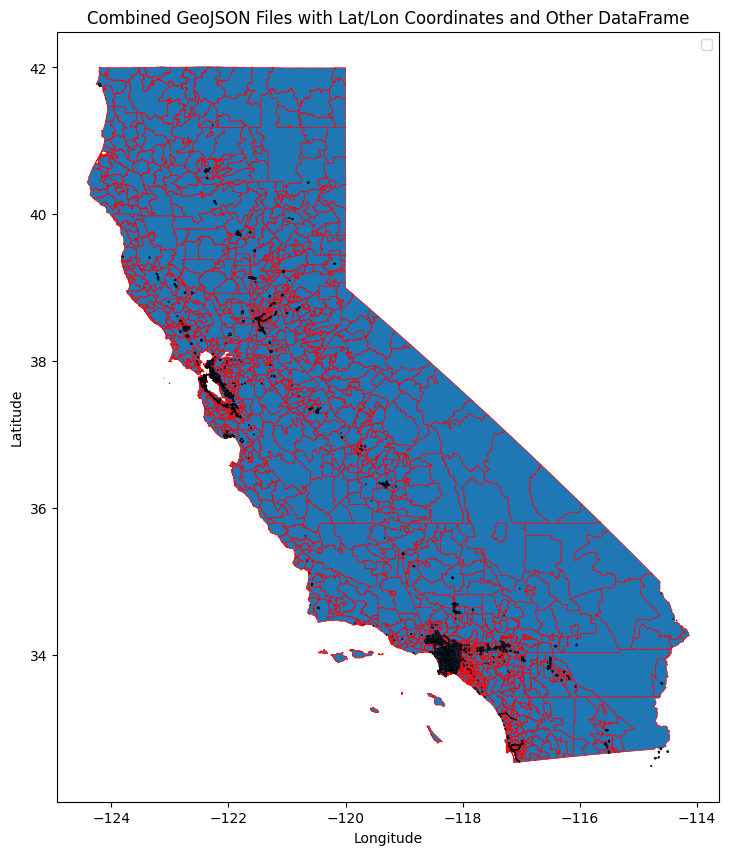

In [13]:
import geopandas as gpd
from pyproj import Transformer
import matplotlib.pyplot as plt

# Replace with the path to your GeoJSON files
geojson_path1 = 'California_Zip_Codes.geojson'
geojson_path2 =  'CA_HQ_Transit_Areas.geojson'

# Read GeoJSON files
gdf1 = gpd.read_file(geojson_path1)
gdf2 = gpd.read_file(geojson_path2)

# Ensure that the 'geometry' column is recognized as a GeoSeries
gdf1 = gdf1.set_geometry('geometry')
gdf2 = gdf2.set_geometry('geometry')

# Define the transformer for both GeoDataFrames
transformer1 = Transformer.from_crs(gdf1.crs, "EPSG:4326", always_xy=True)
transformer2 = Transformer.from_crs(gdf2.crs, "EPSG:4326", always_xy=True)

# Transform the entire GeoDataFrames to latitude and longitude
gdf1 = gdf1.to_crs("EPSG:4326")
gdf2 = gdf2.to_crs("EPSG:4326")

# Extract latitude and longitude
gdf1["latitude"] = gdf1["geometry"].centroid.y
gdf1["longitude"] = gdf1["geometry"].centroid.x

gdf2["latitude"] = gdf2["geometry"].centroid.y
gdf2["longitude"] = gdf2["geometry"].centroid.x

# Plot the GeoDataFrames on the same plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the first GeoDataFrame
gdf1.plot(ax=ax, edgecolor='red', linewidth=0.5, label='GeoJSON File 1')

# Plot the second GeoDataFrame
gdf2.plot(ax=ax, edgecolor='black', linewidth=0.5, label='GeoJSON File 2')

plt.title("Combined GeoJSON Files with Lat/Lon Coordinates and Other DataFrame")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()



<ipython-input-14-4d496fbe8da3>:26: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf1["latitude"] = gdf1["geometry"].centroid.y
<ipython-input-14-4d496fbe8da3>:27: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf1["longitude"] = gdf1["geometry"].centroid.x
<ipython-input-14-4d496fbe8da3>:29: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf2["latitude"] = gdf2["geometry"].centroid.y
<ipython-input-14-4d496fbe8da3>:30: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projec

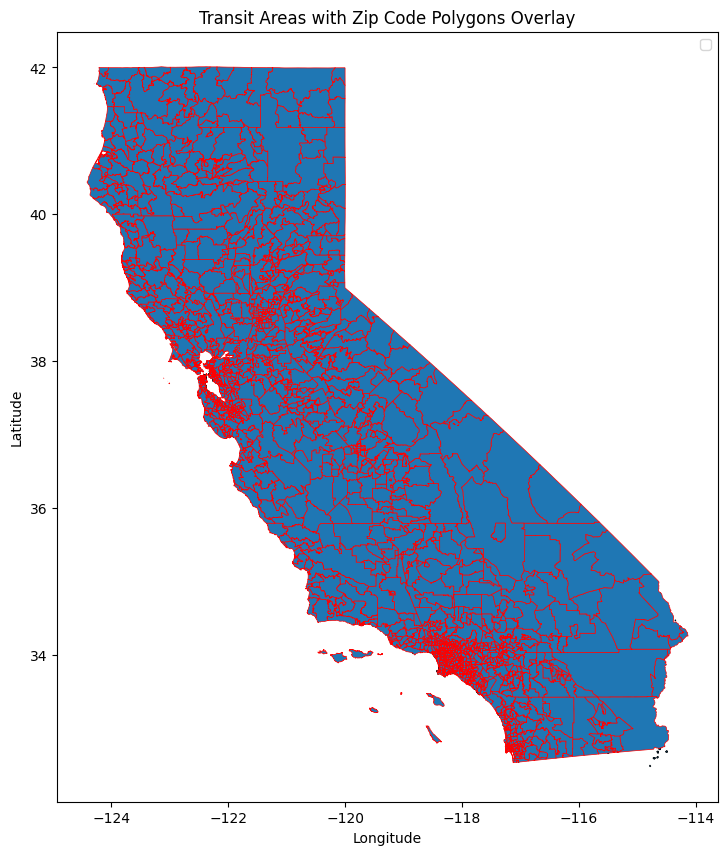

In [14]:
import geopandas as gpd
from pyproj import Transformer
import matplotlib.pyplot as plt

# Replace with the path to your GeoJSON files
geojson_path1 = 'CA_HQ_Transit_Areas.geojson'
geojson_path2 = 'California_Zip_Codes.geojson'

# Read GeoJSON files
gdf1 = gpd.read_file(geojson_path1)
gdf2 = gpd.read_file(geojson_path2)

# Ensure that the 'geometry' column is recognized as a GeoSeries
gdf1 = gdf1.set_geometry('geometry')
gdf2 = gdf2.set_geometry('geometry')

# Define the transformer for both GeoDataFrames
transformer1 = Transformer.from_crs(gdf1.crs, "EPSG:4326", always_xy=True)
transformer2 = Transformer.from_crs(gdf2.crs, "EPSG:4326", always_xy=True)

# Transform the entire GeoDataFrames to the same CRS (if needed)
gdf1 = gdf1.to_crs("EPSG:4326")
gdf2 = gdf2.to_crs("EPSG:4326")

# Extract latitude and longitude (if needed)
gdf1["latitude"] = gdf1["geometry"].centroid.y
gdf1["longitude"] = gdf1["geometry"].centroid.x

gdf2["latitude"] = gdf2["geometry"].centroid.y
gdf2["longitude"] = gdf2["geometry"].centroid.x

# Plot the GeoDataFrames on the same plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot transit areas
gdf1.plot(ax=ax, edgecolor='black', linewidth=0.5, label='Transit Areas')

# Plot zip code polygons on top of transit areas
gdf2.plot(ax=ax, edgecolor='red', linewidth=0.5, label='Zip Code Polygons')

plt.title("Transit Areas with Zip Code Polygons Overlay")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import geopandas as gpd
from pyproj import Transformer
import matplotlib.pyplot as plt

geojson_path = 'California_Zip_Codes.geojson'

gdf = gpd.read_file(geojson_path)

gdf = gdf.set_geometry('geometry')

transformer = Transformer.from_crs(gdf.crs, "EPSG:4326", always_xy=True)

gdf = gdf.to_crs("EPSG:4326")

gdf["latitude"] = gdf["geometry"].apply(lambda geom: geom.centroid.y)
gdf["longitude"] = gdf["geometry"].apply(lambda geom: geom.centroid.x)

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, edgecolor='black', linewidth=0.5)
plt.title("GeoJSON File with Lat/Lon Coordinates")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()